In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot
from keras.models import model_from_json
import os

In [3]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

In [4]:
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]
train_x.shape

W0000 00:00:1733820726.866464   17099 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


TensorShape([60000, 28, 28, 1])

In [7]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', input_shape=train_x[0].shape, padding='same'), # C1
    keras.layers.AveragePooling2D(pool_size=(2, 2)), # S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), # C3
    keras.layers.AveragePooling2D(pool_size=(2, 2)), # S4
    keras.layers.Flatten(), # Flatten
    keras.layers.Dense(120, activation='tanh'), # C5
    keras.layers.Dense(84, activation='tanh'), # F6
    keras.layers.Dense(10, activation='softmax') # Output layer
])

In [8]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [9]:
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))

Epoch 1/5


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8731 - loss: 0.4214 - val_accuracy: 0.9738 - val_loss: 0.0860
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9714 - loss: 0.0954 - val_accuracy: 0.9838 - val_loss: 0.0550
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9808 - loss: 0.0619 - val_accuracy: 0.9878 - val_loss: 0.0412
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9855 - loss: 0.0469 - val_accuracy: 0.9928 - val_loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accuracy: 0.9914 - val_loss: 0.0320


In [10]:
lenet_5_model.evaluate(test_x, test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0593


[0.0503445565700531, 0.9850000143051147]

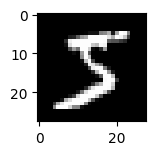

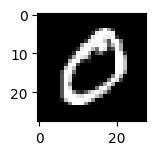

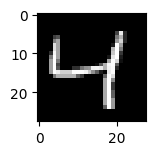

In [11]:
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [15]:
lenet_5_model.save('lenet_5_model.keras')
print(os.listdir('.'))


['main', 'main.cu', 'lenet_5_model.keras', 'results.csv', 'plot_results.py', 'LeNet5.ipynb']


In [16]:
lenet_5_model.save("my.h5")

In [17]:
lenet_5_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

In [18]:
json_model = lenet_5_model.to_json()

In [19]:
with open('fashionmnist_model.json', 'w') as json_file:
    json_file.write(json_model)

In [20]:
lenet_5_model.save_weights('FashionMNIST_weights.h5')

ValueError: The filename must end in `.weights.h5`. Received: filepath=FashionMNIST_weights.h5

In [21]:
lenet_5_model.layers[0].get_weights()[0]

array([[[[-0.22403912,  0.04229098, -0.04907732, -0.06043562,
           0.0855689 , -0.12419754]],

        [[-0.24286234, -0.13242495, -0.17740786,  0.12871036,
           0.2649622 , -0.11049394]],

        [[-0.24712588, -0.02203213,  0.0219142 , -0.05776305,
           0.36080587, -0.16928104]],

        [[-0.3712498 , -0.05772633,  0.29278716, -0.21316844,
           0.2966014 , -0.22999969]],

        [[-0.41738814,  0.29234764,  0.402442  , -0.05912584,
           0.34437406, -0.11056832]]],


       [[[-0.2265464 ,  0.10488181, -0.29601145,  0.06924912,
           0.340579  ,  0.13492008]],

        [[-0.28711784, -0.45039955, -0.26255605,  0.05516574,
           0.37625197,  0.20971644]],

        [[-0.06892633, -0.4524787 ,  0.02904599,  0.1401837 ,
           0.5859028 ,  0.05060672]],

        [[-0.10513807,  0.04175194,  0.68233025, -0.18661067,
           0.3392277 ,  0.13080432]],

        [[-0.10544992,  0.31447348,  0.51488686, -0.103688  ,
           0.17196207,  0.0